In [72]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#### Description :

| Variable | Description|
| :------- | :------: | 
| Model | 4WD/4X4 = Four-wheel drive, AWD = All-wheel drive, FFV = Flexible-fuel vehicle, SWB = Short wheelbase, LWB = Long wheelbase, EWB = Extended wheelbase | 
| Transmission | A = automatic, AM = automated manual, AS = automatic with select shift, AV = continuously variable, M = manual, 3 - 10 = Number of gears | 
| Fuel type | X = regular gasoline, Z = premium gasoline, D = diesel, E = ethanol (E85), N = natural gas |
| Fuel consumption | City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg) |
| CO2 emissions | the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving | 

#### Target Variable:
CO2 emissions is the target variable

In [73]:
data = pd.read_csv('CO2 Emissions.csv')

In [74]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [76]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [77]:
data = data.drop_duplicates()
print(data)

       Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6

In [78]:
data.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [79]:
data.shape

(6282, 12)

In [80]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [81]:
data = data.drop(columns=["Fuel Consumption City (L/100 km)","Fuel Consumption Hwy (L/100 km)"])

In [82]:
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,27,244


In [86]:
data.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

In [87]:
data.Model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], shape=(2053,), dtype=object)

In [89]:
data["Vehicle Class"].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [90]:
data.Transmission.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [91]:
data["Fuel Type"].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [92]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
data[["Make","Model","Vehicle Class","Transmission","Fuel Type"]]=oe.fit_transform(data[["Make","Model","Vehicle Class","Transmission","Fuel Type"]])

In [93]:
data.head(20)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0.0,1057.0,0.0,2.0,4,14.0,4.0,8.5,33,196
1,0.0,1057.0,0.0,2.4,4,25.0,4.0,9.6,29,221
2,0.0,1058.0,0.0,1.5,4,22.0,4.0,5.9,48,136
3,0.0,1233.0,11.0,3.5,6,15.0,4.0,11.1,25,255
4,0.0,1499.0,11.0,3.5,6,15.0,4.0,10.6,27,244
5,0.0,1510.0,2.0,3.5,6,15.0,4.0,10.0,28,230
6,0.0,1778.0,2.0,3.5,6,15.0,4.0,10.1,28,232
7,0.0,1779.0,2.0,3.7,6,15.0,4.0,11.1,25,255
8,0.0,1779.0,2.0,3.7,6,25.0,4.0,11.6,24,267
9,0.0,1803.0,0.0,2.4,4,14.0,4.0,9.2,31,212


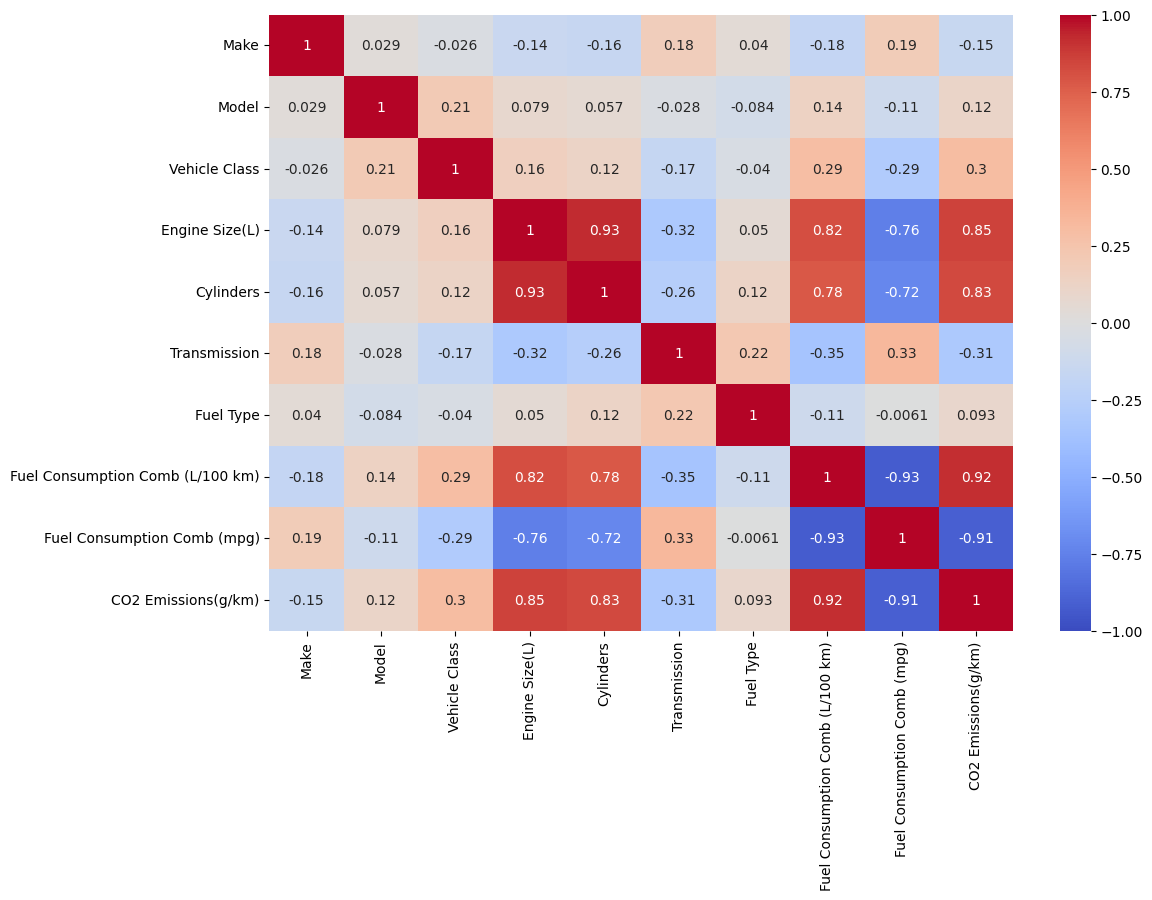

In [94]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='coolwarm')
plt.show()

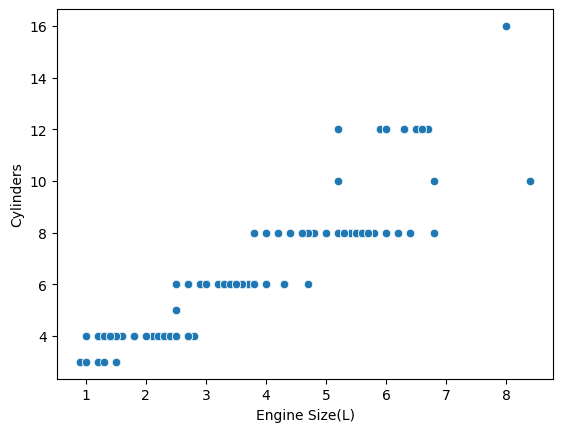

In [95]:
sns.scatterplot(x="Engine Size(L)",
            y="Cylinders",
            data=data)
plt.show()

In [16]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

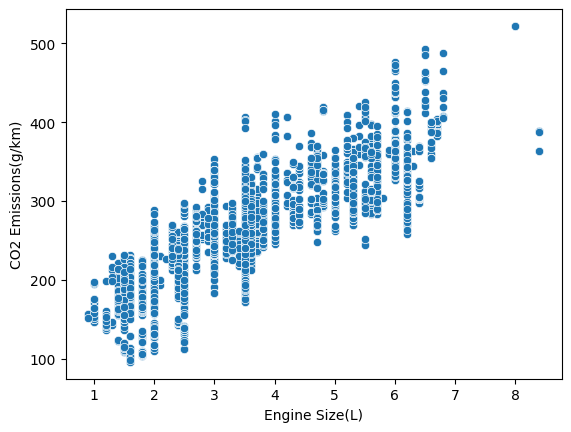

In [96]:
sns.scatterplot(x="Engine Size(L)",
            y="CO2 Emissions(g/km)",
            data=data)
plt.show()

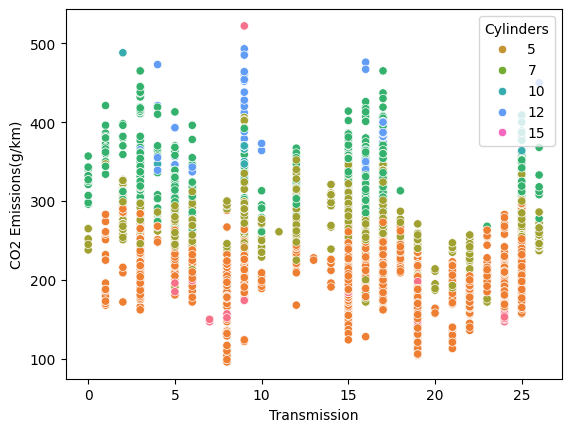

In [97]:
sns.scatterplot(x="Transmission",
                y="CO2 Emissions(g/km)",
                hue="Cylinders",
                data=data,
                palette='husl')
plt.show()

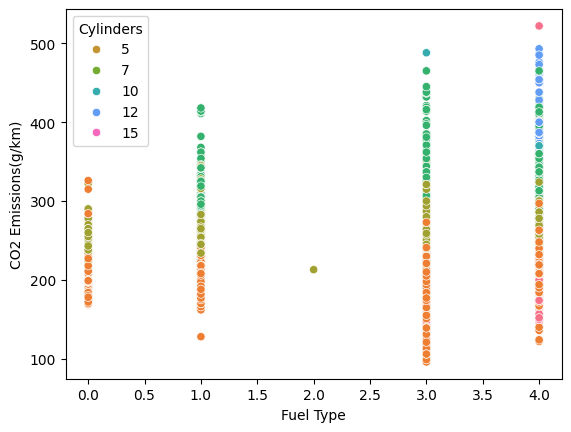

In [98]:
sns.scatterplot(x="Fuel Type",
                y="CO2 Emissions(g/km)",
                hue="Cylinders",
                data=data,
                palette='husl')
plt.show()

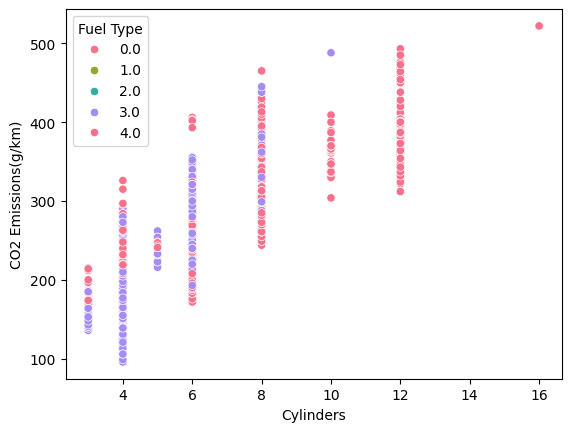

In [99]:
sns.scatterplot(x="Cylinders",
                y="CO2 Emissions(g/km)",
                hue="Fuel Type",
                data=data,
                palette='husl')
plt.show()

<Axes: xlabel='Cylinders', ylabel='count'>

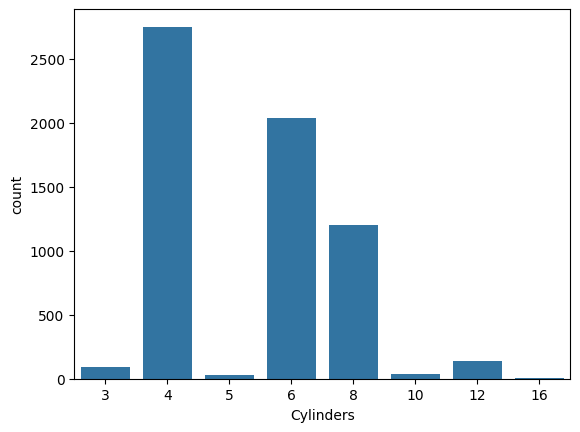

In [100]:
sns.countplot(x="Cylinders",
            data=data)

<Axes: xlabel='Vehicle Class', ylabel='count'>

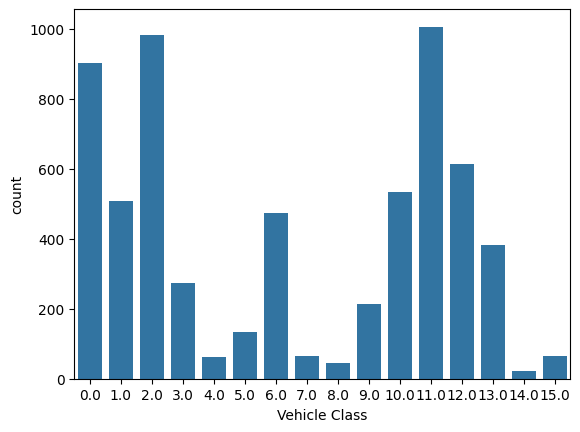

In [101]:
sns.countplot(x="Vehicle Class",
            data=data)

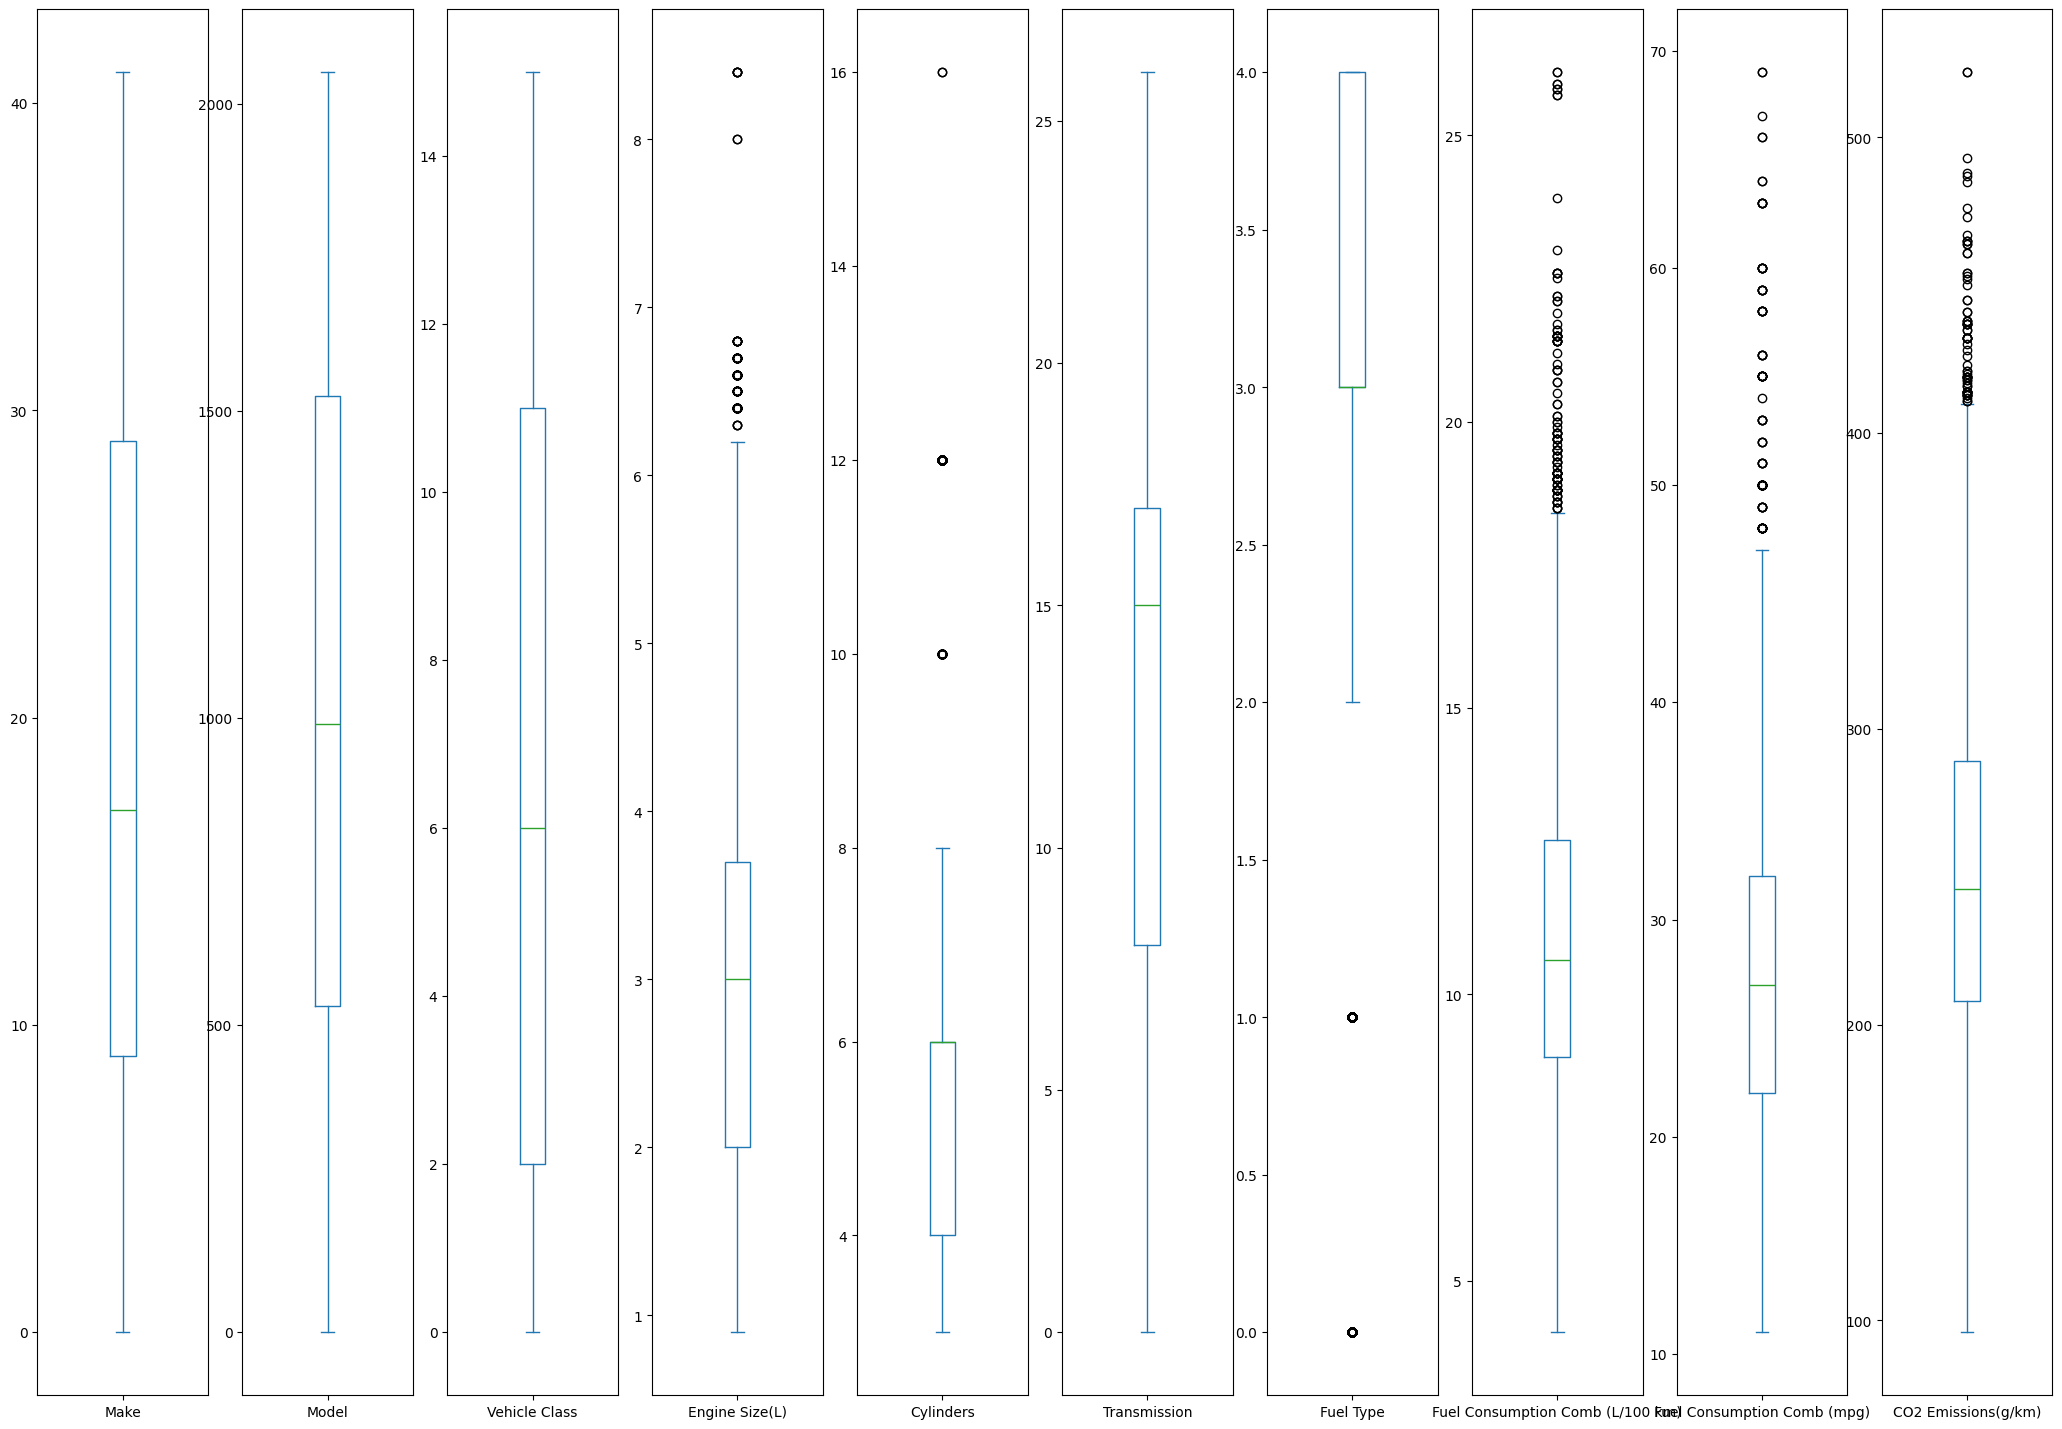

In [102]:
data.plot(kind="box",subplots=True,figsize=(26,18))
plt.show()

In [25]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

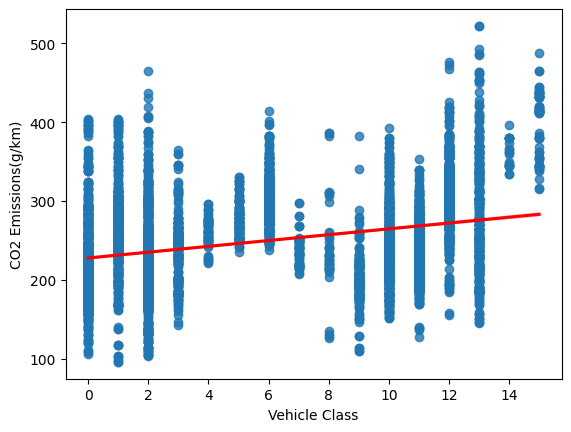

In [103]:
sns.regplot(x="Vehicle Class",
            y="CO2 Emissions(g/km)",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

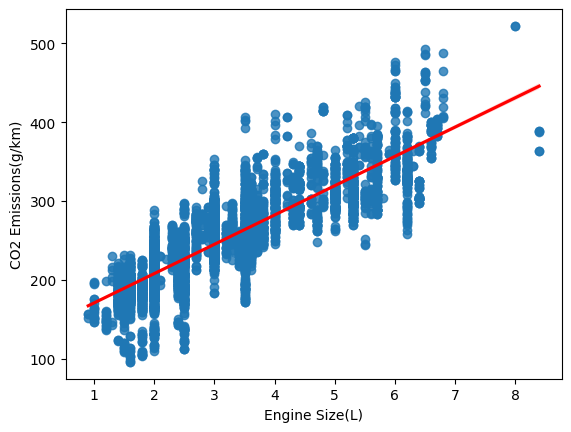

In [104]:
sns.regplot(x="Engine Size(L)",
            y="CO2 Emissions(g/km)",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

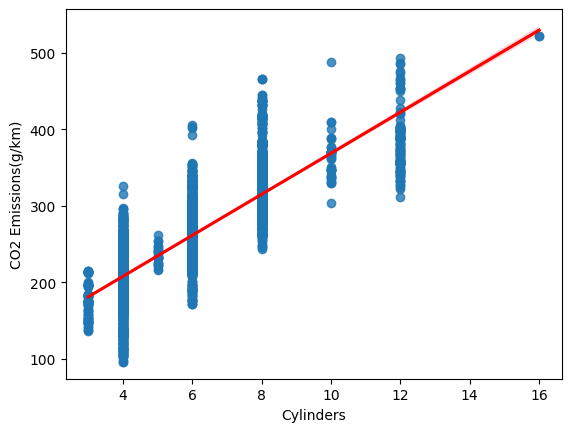

In [28]:
sns.regplot(x="Cylinders",
            y="CO2 Emissions(g/km)",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

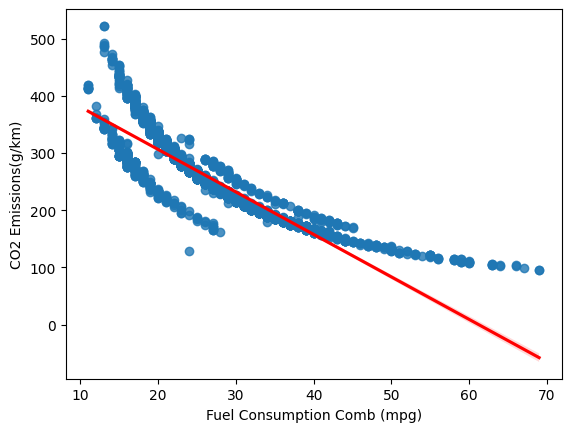

In [105]:
sns.regplot(x="Fuel Consumption Comb (mpg)",
            y="CO2 Emissions(g/km)",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

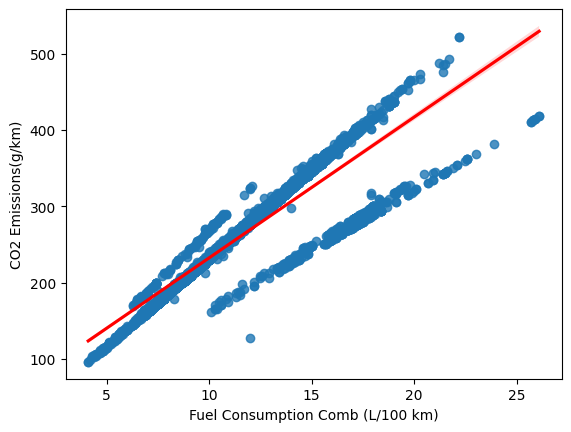

In [106]:
sns.regplot(x="Fuel Consumption Comb (L/100 km)",
            y="CO2 Emissions(g/km)",
            data=data,
            line_kws = {'color':'red'},
            order=1)
plt.show()

In [107]:
#Get Independent and dependent variables for your model
X = data.drop(columns=["CO2 Emissions(g/km)"]) #independent variables
y = data['CO2 Emissions(g/km)'] #dependent variable

In [108]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error

In [109]:
# Regression model
model = LinearRegression()

In [110]:
# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [111]:
# -------------------------------------------------------------
# R-Squared (Default for Regression)
# -------------------------------------------------------------
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print("R² Scores:", r2_scores)
print("Mean R²:", r2_scores.mean())


R² Scores: [0.90903227 0.91445241 0.91756123 0.91433183 0.92034889]
Mean R²: 0.9151453253195472


In [112]:
# -------------------------------------------------------------
# Mean Absolute Error (MAE)
# -------------------------------------------------------------
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
#A scorer is a wrapper around an arbitrary metric or loss function that is called with the signature scorer(estimator, X, y_true, **kwargs).
mae_scores = cross_val_score(model, X, y, cv=kf, scoring=mae_scorer)

print("\nMAE Scores (Negative):", mae_scores)
print("Mean MAE:", -mae_scores.mean())


MAE Scores (Negative): [-11.9800597  -11.83273012 -11.26907111 -10.93600884 -10.87452324]
Mean MAE: 11.3784786015508


In [113]:
# -------------------------------------------------------------
# Mean Squared Error (MSE) & RMSE
# -------------------------------------------------------------
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)

print("\nMSE Scores (Negative):", mse_scores)
print("Mean MSE:", -mse_scores.mean())
print("Mean RMSE:", np.sqrt(-mse_scores.mean()))


MSE Scores (Negative): [-328.2772288  -320.02774315 -289.28512712 -282.01267168 -270.88330293]
Mean MSE: 298.09721473540674
Mean RMSE: 17.26549202123724


In [114]:
# -------------------------------------------------------------
# Manual K-Fold Loop (To show fold-wise performance)
# -------------------------------------------------------------
print("\n===== Manual k-fold Cross Validation Loop =====")
fold = 1
manual_mae_scores = []

for train_idx, test_idx in kf.split(X):
    X_train = X.iloc[train_idx]
    X_test  = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test  = y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    manual_mae_scores.append(mae)

    print(f"Fold {fold} MAE: {mae:.4f}")
    fold += 1

print("Manual Mean MAE:", np.mean(manual_mae_scores))


===== Manual k-fold Cross Validation Loop =====
Fold 1 MAE: 11.9801
Fold 2 MAE: 11.8327
Fold 3 MAE: 11.2691
Fold 4 MAE: 10.9360
Fold 5 MAE: 10.8745
Manual Mean MAE: 11.3784786015508


In [115]:
y_pred.shape

(1256,)

In [116]:
print(y_pred)

[269.34831969 260.68795017 246.8186233  ... 196.78543097 220.5745409
 225.43921501]


In [47]:
from sklearn.model_selection import StratifiedKFold

In [55]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [117]:
# -------------------------------------------------------------
# Stratified K-Fold Loop (To show fold-wise performance)
# -------------------------------------------------------------
print("\n===== Stratified k-fold Cross Validation Loop =====")
fold = 1
stratified_mae_scores = []

for train_idx, test_idx in skf.split(X, y):
    X_train = X.iloc[train_idx]
    X_test  = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test  = y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    manual_mae_scores.append(mae)

    print(f"Fold {fold} MAE: {mae:.4f}")
    fold += 1

print("Manual Mean MAE:", np.mean(manual_mae_scores))


===== Stratified k-fold Cross Validation Loop =====
Fold 1 MAE: 11.7397
Fold 2 MAE: 11.4336
Fold 3 MAE: 11.5176
Fold 4 MAE: 11.2605
Fold 5 MAE: 10.8589
Manual Mean MAE: 11.370271106874565


C:\Users\hp\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [57]:
y_pred.shape

(1256,)

In [118]:
print(y_pred)

[220.55345492 246.01541092 213.78122345 ... 219.67397219 225.27713609
 217.81928879]


In [120]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

In [121]:
# -------------------------------------------------------------
# Repeated K-Fold Loop (To show fold-wise performance)
# -------------------------------------------------------------
print("\n===== Repeated k-fold Cross Validation Loop =====")
fold = 1
stratified_mae_scores = []

for train_idx, test_idx in rkf.split(X, y):
    X_train = X.iloc[train_idx]
    X_test  = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test  = y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    manual_mae_scores.append(mae)

    print(f"Fold {fold} MAE: {mae:.4f}")
    fold += 1

print("Manual Mean MAE:", np.mean(manual_mae_scores))


===== Repeated k-fold Cross Validation Loop =====
Fold 1 MAE: 11.9801
Fold 2 MAE: 11.8327
Fold 3 MAE: 11.2691
Fold 4 MAE: 10.9360
Fold 5 MAE: 10.8745
Fold 6 MAE: 11.3388
Fold 7 MAE: 11.3742
Fold 8 MAE: 11.5135
Fold 9 MAE: 11.7623
Fold 10 MAE: 10.8489
Fold 11 MAE: 10.9466
Fold 12 MAE: 11.5113
Fold 13 MAE: 11.7324
Fold 14 MAE: 10.9508
Fold 15 MAE: 11.7655
Manual Mean MAE: 11.373419900700863


In [63]:
y_pred.shape

(1256,)

In [64]:
print(y_pred)

[221.38644516 260.44211675 339.48305477 ... 175.96106935 210.69804672
 215.05618834]


In [62]:
from sklearn.model_selection import LeaveOneOut #very slow in performance and avoid using it

In [122]:
# -------------------------------------------------------------
# Leave one out Loop (To show fold-wise performance)
# -------------------------------------------------------------
print("\n===== Leave one out Cross Validation Loop =====")
loo = LeaveOneOut()
mae_scores = []
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_scores.append(mean_absolute_error([y_test.values[0]], [y_pred[0]]))

print("LOOCV Mean MAE:", np.mean(mae_scores))


===== Leave one out Cross Validation Loop =====
LOOCV Mean MAE: 11.37005652664478


In [123]:
from sklearn.model_selection import LeavePOut

In [ ]:
# -------------------------------------------------------------
# Leave p out Loop (To show fold-wise performance)
# -------------------------------------------------------------
print("\n===== Leave p out Cross Validation Loop =====")
lpo = LeavePOut(p=2)   # leave 2 points out

mae_scores = []

for train_idx, test_idx in lpo.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))

print("LeavePOut Mean MAE:", np.mean(mae_scores))